# 1.

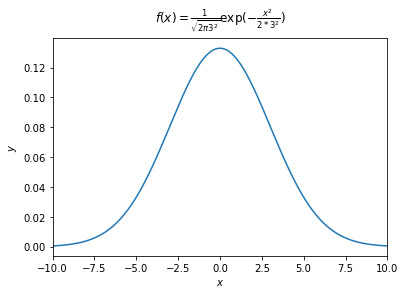

In [1]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-10,10,1000)
y = (np.exp(-(x**2)/(18)))*(18*(np.pi))**(-0.5)


plt.title(r"$ f(x)=\frac {1}{\sqrt{2\pi 3^{2}}} \exp({-\frac {x^2}{2*3^2}})$",y=1.05)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.xlim(-10,10)
plt.plot(x,y)
plt.show()

# 2.

In [2]:
under = np.float32(1.0)
over = np.float32(1.0)
final_u=0
final_o=0
Nu=0
No=0
for n in np.arange(2**9):
    final_u=under
    under = under*np.float32(0.5); Nu=Nu+1
    if under == 0: break
for n in np.arange(2**9):
    final_o=over
    over = over*np.float32(2); No=No+1
    if np.isinf(over): break

print("For single precision, underflow limit is",final_u,"=2^(-149)","with",Nu,"number of iterations.")
print("Overflow limit is",final_o,"=2^(127)","with",No,"number of iterations.","Technically, it should be 2^(128)-1.")

For single precision, underflow limit is 1.4013e-45 =2^(-149) with 150 number of iterations.
Overflow limit is 1.70141e+38 =2^(127) with 128 number of iterations. Technically, it should be 2^(128)-1.


C:\Users\Wang\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in float_scalars
  del sys.path[0]


In [3]:
under = np.float64(1.0)
over = np.float64(1.0)
final_u=0
final_o=0
Nu=0
No=0
for n in np.arange(2**13):
    final_u=under
    under = under*np.float64(0.5); Nu=Nu+1
    if under == 0: break
for n in np.arange(2**13):
    final_o=over
    over = over*np.float64(2); No=No+1
    if np.isinf(over): break

print("For Double precision, underflow limit is",final_u,"=2^(-1074)","with",Nu,"number of iterations.")
print("Overflow limit is",final_o,"=2^(1023)","with",No,"number of iterations.","Technically, it should be 2^(1024)-1.")

For Double precision, underflow limit is 4.94065645841e-324 =2^(-1074) with 1075 number of iterations.
Overflow limit is 8.98846567431e+307 =2^(1023) with 1024 number of iterations. Technically, it should be 2^(1024)-1.


C:\Users\Wang\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]


In [4]:
under = np.int64(1)
over = np.int64(1.0)
final_u=0
final_o=0
Nu=0
No=0
for n in np.arange(2**13):
    final_u=under
    under = under*np.int64(-2); Nu=Nu+1
    if under == 0: break
for n in np.arange(2**13):
    final_o=over
    over = over*np.int64(2); No=No+1
    if over < 0: break

print("For integers, underflow limit is",final_u,"=-2^(63)","with",Nu,"number of iterations.")
print("Overflow limit is",final_o,"=2^(62)","with",No,"number of iterations.","Technically, it should be 2^(63)-1.")

For integers, underflow limit is -9223372036854775808 =-2^(63) with 64 number of iterations.
Overflow limit is 4611686018427387904 =2^(62) with 63 number of iterations. Technically, it should be 2^(63)-1.


C:\Users\Wang\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in longlong_scalars
  del sys.path[0]


# 3.

"Good Way"


In [23]:
import math as ma
import scipy.misc as sci

def Goodsum( a=None, tolerance=None):
    sums=0
    error=np.inf
    b=1
    fac=1
    k=0
    while error > tolerance:
        sums=sums + (a**(b))/(fac*(-1)**k)
        error=np.abs(np.sin(a)-sums)/np.abs(np.sin(a))
        fac=fac*(b+1)*(b+2)
        k=k+1
        b=b+2
    return(a, (b-1)/2, sums, error)

In [24]:
print( "x", "imax", "sum", "|sum - sin(x)|/sin(x)")
for j in [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1, 3,10]:
    print(Goodsum(j, 10**(-8)))

x imax sum |sum - sin(x)|/sin(x)
(0.01, 2.0, 0.009999833333333333, 8.3334555658333091e-11)
(0.05, 3.0, 0.04997916927083334, 3.1014511281667759e-12)
(0.1, 3.0, 0.09983341666666667, 1.9871622531017512e-10)
(0.15, 3.0, 0.1494381328125, 2.2678334552589338e-09)
(0.2, 4.0, 0.19866933079365082, 7.0992315183418576e-12)
(0.3, 4.0, 0.29552020660714284, 1.833942365347668e-10)
(0.5, 5.0, 0.4794255386164159, 2.5474023339772714e-11)
(1, 6.0, 0.841470984648068, 1.8993938788946215e-10)
(3, 10.0, 0.14112000785871492, 1.4253987938012473e-09)
(10, 20.0, -0.5440211137210484, 5.2050896787711579e-09)


With small numbers, the algorithm converges in taylor expansion when the tolerance is at 10^(-8). 

In [25]:
print( "x", "imax", "sum", "|sum - sin(x)|/sin(x)")
for j in [4, 5, 6, 10, 30]:
    print(Goodsum(j, 10**(-8)))

x imax sum |sum - sin(x)|/sin(x)
(4, 11.0, -0.7568024926569087, 3.50292121320536e-09)
(5, 13.0, -0.9589242739994107, 6.9215865837715699e-10)
(6, 15.0, -0.2794154980429545, 5.5820578298044331e-10)
(10, 20.0, -0.5440211137210484, 5.2050896787711579e-09)


KeyboardInterrupt: 

For large number away from zero like 30, the algorithm would take too long to complete.

In [26]:
print("Here I am using the sin(x+2n*pi)=sin(x) formula.")
print( "x", "imax", "sum", "|sum - sin(x)|/sin(x)")
sample= [4, 2.5*np.pi , 5, 6, 10, 30, 100]
for j in np.arange(7):
    while np.abs(sample[j]) > np.pi:
        sample[j]=sample[j]-2*np.pi
for k in sample:
    print(Goodsum(k, 10**(-8)))

Here I am using the sin(x+2n*pi)=sin(x) formula.
x imax sum |sum - sin(x)|/sin(x)
(-2.2831853071795862, 8.0, -0.7568024918601203, 4.5557568473519771e-09)
(1.5707963267948966, 7.0, 1.0000000006627803, 6.6278027510691118e-10)
(-1.2831853071795862, 6.0, -0.958924270588551, 4.2491232653960291e-09)
(-0.28318530717958623, 4.0, -0.27941549816667366, 1.1542659255929851e-10)
(-2.5663706143591725, 9.0, -0.5440211113737637, 8.9039472107771087e-10)
(-1.4159265358979312, 7.0, -0.9880316242327937, 1.4162711245504947e-10)
(-0.5309649148734152, 5.0, -0.5063656411334336, 4.6700499520629683e-11)


"Bad Way"


In [34]:
def badsum( a=None, tolerance=None):
    error=np.inf
    k=1
    while error > tolerance:
        termsarray=np.zeros(k)
        for i in np.arange(k, dtype=np.int64):
            termsarray[i] =(a**(2*i+1))/(ma.factorial(2*i+1)*(-1)**i)
        sums=np.sum(termsarray)
        error=np.abs(np.sin(a)-sums)/np.abs(np.sin(a))
        k=k+1                    
    return(a, k-1, sums, error)


In [38]:
print( "x", "imax", "sum", "|sum - sin(x)|/sin(x)")
for j in [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1, 3]:
    print(badsum(j, 10**(-8)))

x imax sum |sum - sin(x)|/sin(x)
(0.01, 2, 0.0099998333333333328, 8.3334555658333091e-11)
(0.05, 3, 0.049979169270833339, 3.1014511281667759e-12)
(0.1, 3, 0.099833416666666674, 1.9871622531017512e-10)
(0.15, 3, 0.14943813281250001, 2.2678334552589338e-09)
(0.2, 4, 0.19866933079365082, 7.0992315183418576e-12)
(0.3, 4, 0.29552020660714284, 1.833942365347668e-10)
(0.5, 5, 0.4794255386164159, 2.5474023339772714e-11)
(1, 6, 0.84147098464806802, 1.8993938788946215e-10)
(3, 10, 0.14112000785871492, 1.4253987938012473e-09)


The "bad" sums converges for small number but not 10. It converges slightly differently than the "good" sums:

x imax sum |sum - sin(x)|/sin(x)
(0.01, 2.0, 0.009999833333333333, 8.3334555658333091e-11)
(0.05, 3.0, 0.04997916927083334, 3.1014511281667759e-12)
(0.1, 3.0, 0.09983341666666667, 1.9871622531017512e-10)
(0.15, 3.0, 0.1494381328125, 2.2678334552589338e-09)
(0.2, 4.0, 0.19866933079365082, 7.0992315183418576e-12)
(0.3, 4.0, 0.29552020660714284, 1.833942365347668e-10)
(0.5, 5.0, 0.4794255386164159, 2.5474023339772714e-11)
(1, 6.0, 0.841470984648068, 1.8993938788946215e-10)
(3, 10.0, 0.14112000785871492, 1.4253987938012473e-09)
(10, 20.0, -0.5440211137210484, 5.2050896787711579e-09)

In [39]:
print(badsum(10, 10**(-8)))

KeyboardInterrupt: 

For number like 10 and above, the algorithm doesn't converge.

In [48]:
print( "x", "imax", "sum", "|sum - sin(x)|/sin(x)")
for j in [0.01, 0.05, -0.02, 0.15, 0.2, 0.3, 0.5, 1, 3,10]:
    print(Goodsum(j, 10**(-16)))

x imax sum |sum - sin(x)|/sin(x)
(0.01, 4.0, 0.009999833334166664, 0.0)
(0.05, 4.0, 0.04997916927067833, 0.0)
(-0.02, 4.0, -0.01999866669333308, 0.0)


OverflowError: int too large to convert to float

When the tolerance is set to 10^(-16), the algorithm only converges in small number like 0.05, and the error is so small that the computer consider it to be zero.